In [199]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(r"C:\Users\PC\Desktop\Abschlussprojekt\data\share-of-adults-who-are-overweight.csv")
data = data.dropna()

In [200]:
data

,Entity,Code,Year,"Prevalence of overweight among adults, BMI >= 25 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+ years"
0,Afghanistan,AFG,1975,6.1
1,Afghanistan,AFG,1976,6.3
2,Afghanistan,AFG,1977,6.5
3,Afghanistan,AFG,1978,6.8
4,Afghanistan,AFG,1979,7.0
...,...,...,...,...
8269,Zimbabwe,ZWE,2012,36.6
8270,Zimbabwe,ZWE,2013,37.0
8271,Zimbabwe,ZWE,2014,37.3
8272,Zimbabwe,ZWE,2015,37.7


In [201]:
print(data.columns)

Index(['Entity', 'Code', 'Year',
       'Prevalence of overweight among adults, BMI >= 25 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+  years'],
      dtype='object')


In [202]:
data = data.rename(columns={"Entity": "Country"})
data = data.rename(columns={"Prevalence of overweight among adults, BMI >= 25 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+  years": "Overweight (%)"})

In [203]:
data["id"] = range(len(data))

In [204]:
cols = ["id"] + [col for col in data.columns if col != "id"]
data = data[cols]

In [205]:
data

,id,Country,Code,Year,Overweight (%)
0,0,Afghanistan,AFG,1975,6.1
1,1,Afghanistan,AFG,1976,6.3
2,2,Afghanistan,AFG,1977,6.5
3,3,Afghanistan,AFG,1978,6.8
4,4,Afghanistan,AFG,1979,7.0
...,...,...,...,...,...
8269,7975,Zimbabwe,ZWE,2012,36.6
8270,7976,Zimbabwe,ZWE,2013,37.0
8271,7977,Zimbabwe,ZWE,2014,37.3
8272,7978,Zimbabwe,ZWE,2015,37.7


In [206]:
data.describe()

,id,Year,Overweight (%)
count,7980.000000,7980.000000,7980.000000
mean,3989.500000,1995.500000,37.810627
std,2303.771907,12.121678,17.917396
min,0.000000,1975.000000,4.600000
25%,1994.750000,1985.000000,21.700000
50%,3989.500000,1995.500000,39.700000
75%,5984.250000,2006.000000,51.700000
max,7979.000000,2016.000000,88.500000


In [251]:
high_threshold = 50
low_threshold = 25


# Länder mit nur hohen Werten
high_only = data.groupby("Country").filter(
    lambda x: (x["Overweight (%)"] > high_threshold).all()
)["Country"].unique()

# Länder mit nur niedrigen Werten
low_only = data.groupby("Country").filter(
    lambda x: (x["Overweight (%)"] < low_threshold).all()
)["Country"].unique()

high_data = data[data["Country"].isin(high_only)]
low_data = data[data["Country"].isin(low_only)]


C:\Users\PC\AppData\Local\Temp\ipykernel_19312\1965376287.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


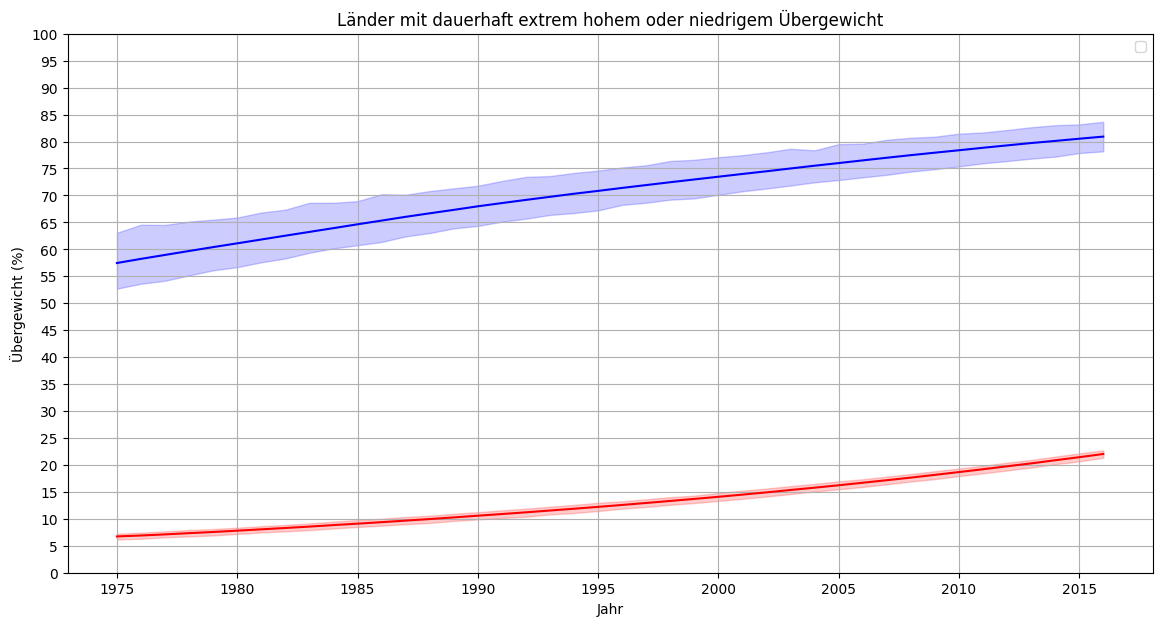

In [252]:
plt.figure(figsize=(14, 7))

# Hohe Länder: blau
sb.lineplot(
    data=high_data,
    x="Year",
    y="Overweight (%)",
    legend=False,
    color="blue"
)

# Niedrige Länder: rot
sb.lineplot(
    data=low_data,
    x="Year",
    y="Overweight (%)",
    legend=False,
    color="red"
)

plt.title("Länder mit dauerhaft extrem hohem oder niedrigem Übergewicht")
plt.ylabel("Übergewicht (%)")
plt.xlabel("Jahr")
plt.xticks(np.arange(1975, 2017, 5))
plt.yticks(np.arange(0, 101, 5))
plt.grid(True)
plt.legend()
plt.show()


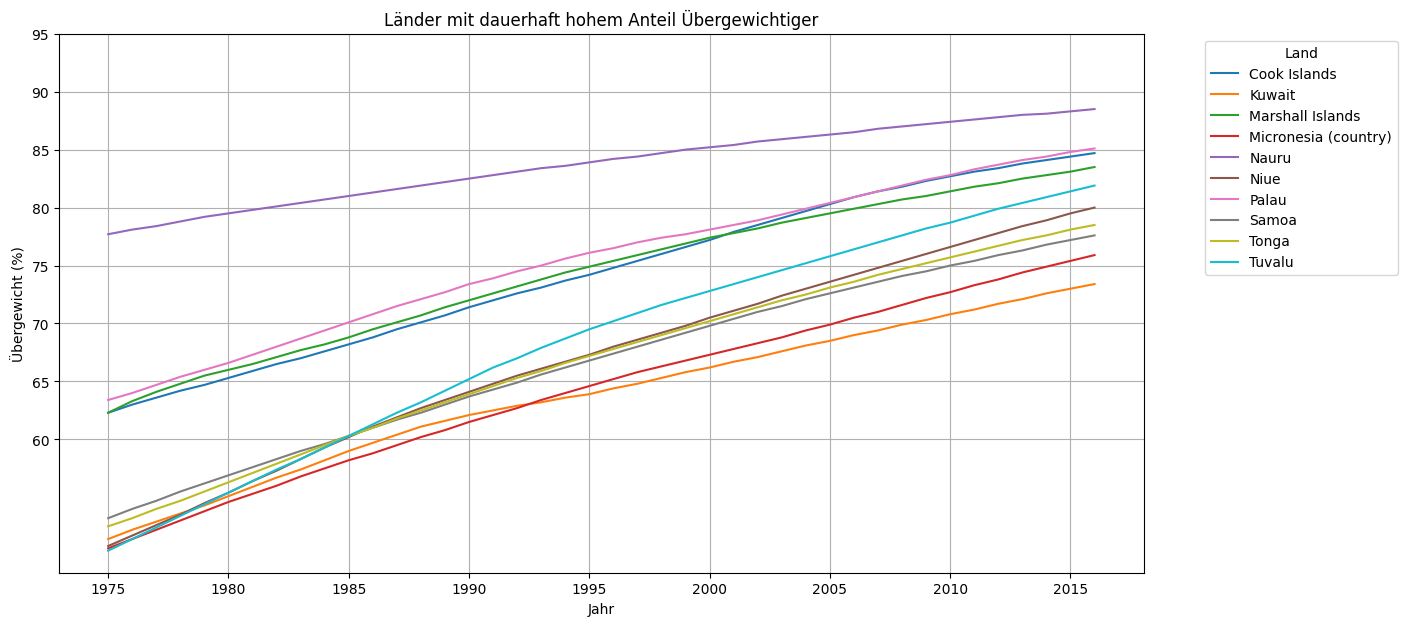

In [253]:




plt.figure(figsize=(14, 7))
sb.lineplot(
    data=high_data,
    x="Year",
    y="Overweight (%)",
    hue="Country"
)

plt.title("Länder mit dauerhaft hohem Anteil Übergewichtiger")
plt.ylabel("Übergewicht (%)")
plt.xlabel("Jahr")
plt.xticks(np.arange(1975, 2017, 5))
plt.yticks(np.arange(60, 100, 5))
plt.grid(True)
plt.legend(title="Land", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


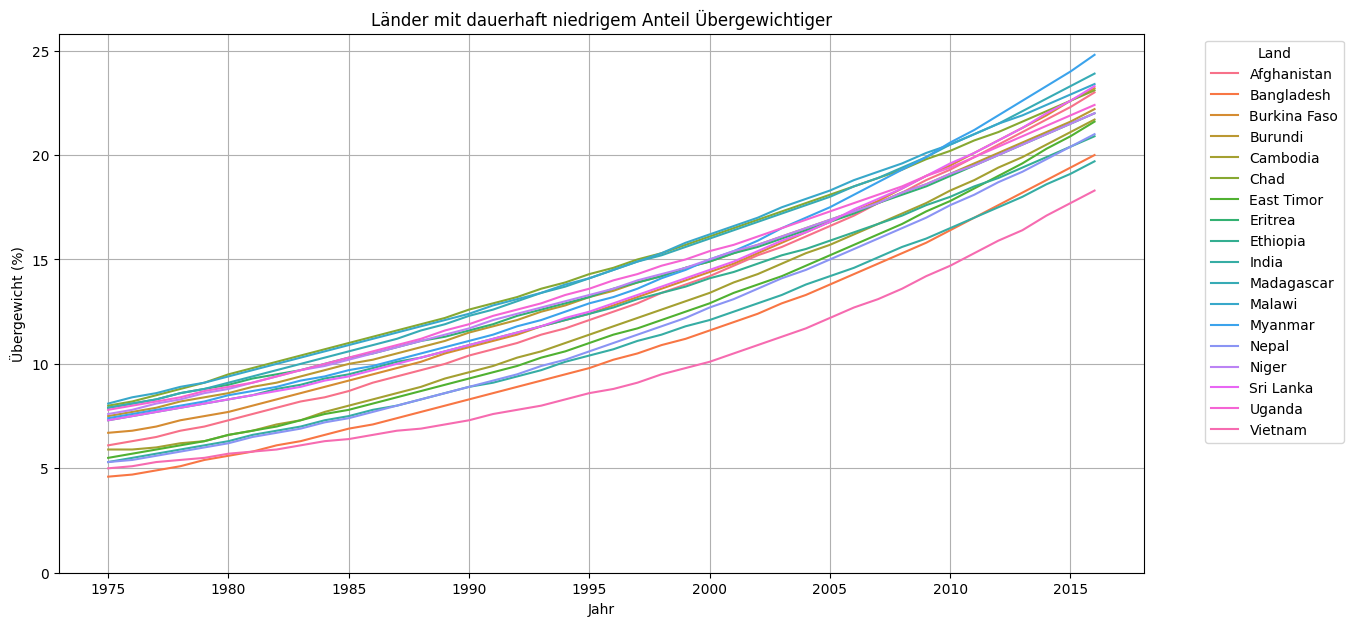

In [236]:
plt.figure(figsize=(14, 7))
sb.lineplot(
    data=low_data,
    x="Year",
    y="Overweight (%)",
    hue="Country"
)

plt.title("Länder mit dauerhaft niedrigem Anteil Übergewichtiger")
plt.ylabel("Übergewicht (%)")
plt.xlabel("Jahr")
plt.xticks(np.arange(1975, 2017, 5))
plt.yticks(np.arange(0, 30, 5))
plt.grid(True)
plt.legend(title="Land", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legende rechts außen
plt.show()

In [237]:
print("Anzahl high_only Länder:", len(high_only))
print("Anzahl low_only Länder:", len(low_only))

Anzahl high_only Länder: 4
Anzahl low_only Länder: 18


In [238]:
industrielaender = ["Germany", "France", "United Kingdom", "Italy", "Norway", "Canada", "United States", "Japan"]
entwicklungslaender = ["Ethiopia", "Afghanistan", "Bangladesh", "Benin", "Bhutan", "Botswana", "Burundi", "Gambia", "Guinea", "Haiti", 
                       "Yemen", "Comoros", "Lesotho", "Malawi", "Maldives", "Mali", "Nepal", "Niger", "Rwanda", "Samoa",
                      "Somalia", "Tanzania"]

In [239]:
data_filtered = data[data["Country"].isin(industrielaender + entwicklungslaender)]


In [249]:
farben = {}
palette_a = sb.color_palette("Blues", n_colors=len(industrielaender))
palette_b = sb.color_palette("Reds", n_colors=len(entwicklungslaender))

for i, land in enumerate(industrielaender):
    farben[land] = palette_a[i]
for i, land in enumerate(entwicklungslaender):
    farben[land] = palette_b[i]

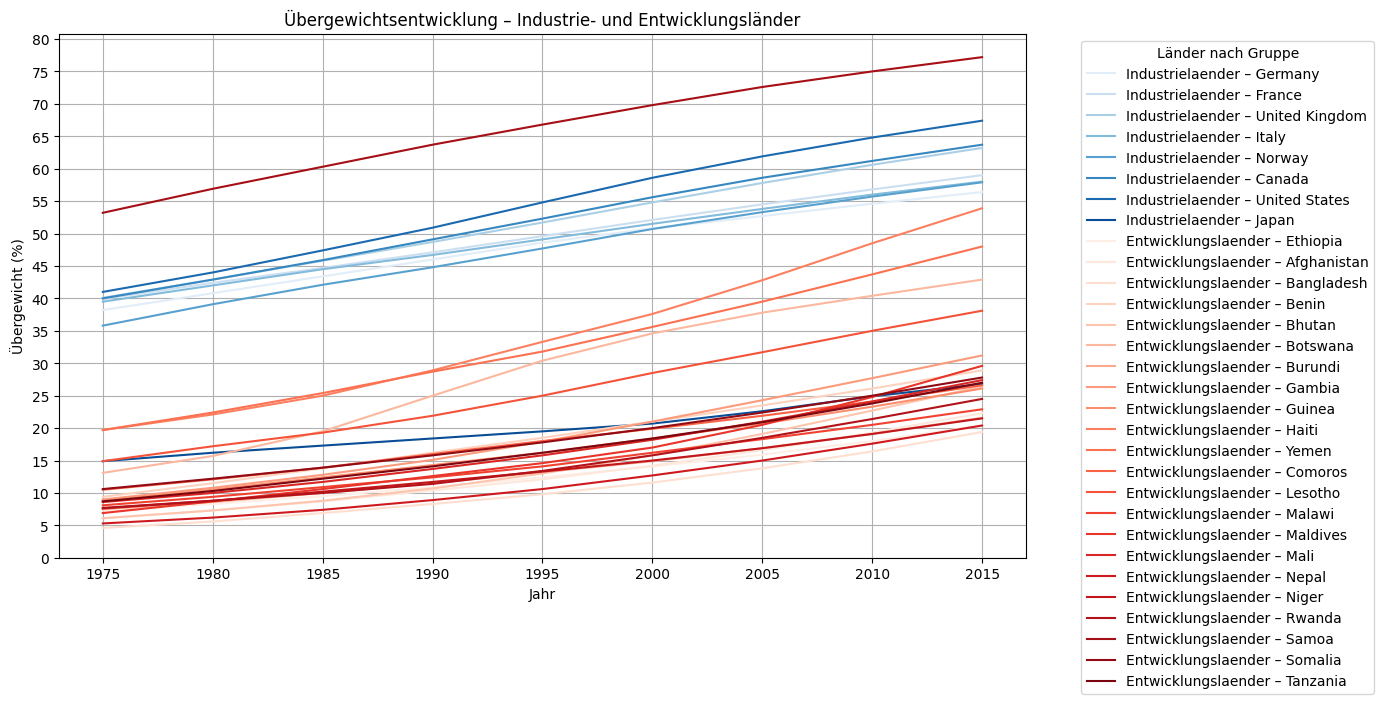

In [250]:
plt.figure(figsize=(14, 7))

# Linien plotten – Gruppe A
for land in industrielaender:
    df = data_filtered[data_filtered["Country"] == land]
    plt.plot(df["Year"], df["Overweight (%)"], label=f"Industrielaender – {land}", color=farben[land])

# Linien plotten – Gruppe B
for land in entwicklungslaender:
    df = data_filtered[data_filtered["Country"] == land]
    plt.plot(df["Year"], df["Overweight (%)"], label=f"Entwicklungslaender – {land}", color=farben[land])

# Plot anpassen
plt.title("Übergewichtsentwicklung – Industrie- und Entwicklungsländer")
plt.xlabel("Jahr")
plt.ylabel("Übergewicht (%)")
plt.xticks(range(data_filtered["Year"].min(), data_filtered["Year"].max()+1, 5))
plt.yticks(range(0, 81, 5))
plt.grid(True)

# Legende sauber darstellen
plt.legend(title="Länder nach Gruppe", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [260]:
# Filter für Jahr 2015
data_2015 = data[data["Year"] == 2015]

# Länder aus Gruppe B mit Wert > 75%
b_high = data_2015[
    (data_2015["Country"].isin(entwicklungslaender)) & 
    (data_2015["Overweight (%)"] > 75)
]["Country"].unique()

# Länder aus Gruppe A mit Wert < 30%
a_low = data_2015[
    (data_2015["Country"].isin(industrielaender)) & 
    (data_2015["Overweight (%)"] < 30)
]["Country"].unique()

print("Entwicklungsland mit Übergewicht > 75% im Jahr 2015:", list(b_high))
print("Industrieland mit Übergewicht < 30% im Jahr 2015:", list(a_low))

Entwicklungsland mit Übergewicht > 75% im Jahr 2015: ['Samoa']
Industrieland mit Übergewicht < 30% im Jahr 2015: ['Japan']


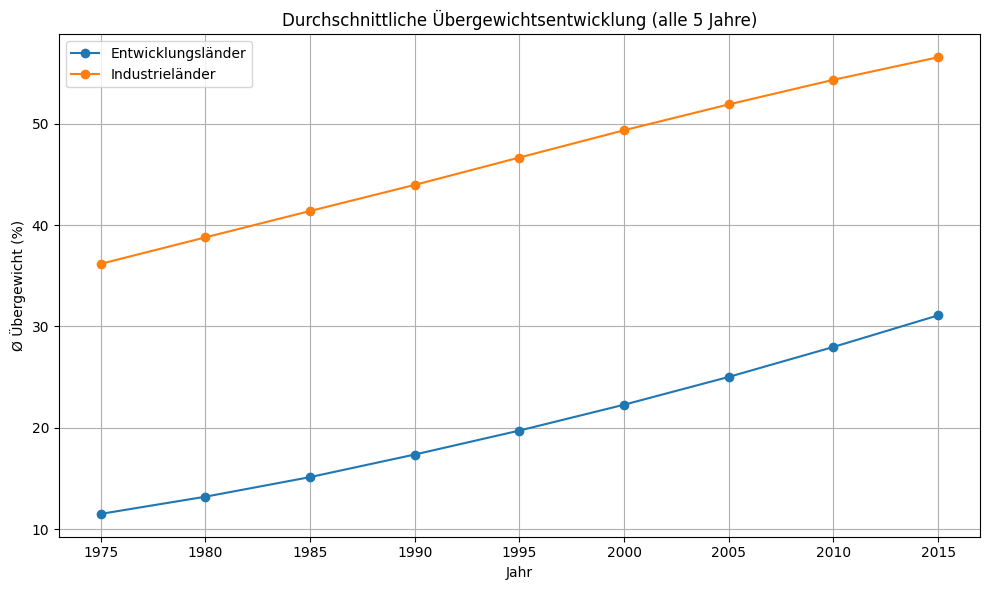

In [261]:
# Nur alle 5 Jahre behalten
data_filtered = data_filtered[data_filtered["Year"] % 5 == 0]

# Gruppenzuordnung hinzufügen
def gruppe_zuordnen(land):
    if land in industrielaender:
        return "Industrieländer"
    elif land in entwicklungslaender:
        return "Entwicklungsländer"
    else:
        return "Unbekannt"

data_filtered["Gruppe"] = data_filtered["Country"].apply(gruppe_zuordnen)

# Durchschnitt pro Jahr und Gruppe berechnen
avg_data = data_filtered.groupby(["Year", "Gruppe"])["Overweight (%)"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))

for gruppe in avg_data["Gruppe"].unique():
    df = avg_data[avg_data["Gruppe"] == gruppe]
    plt.plot(df["Year"], df["Overweight (%)"], marker="o", label=gruppe)

plt.title("Durchschnittliche Übergewichtsentwicklung (alle 5 Jahre)")
plt.xlabel("Jahr")
plt.ylabel("Ø Übergewicht (%)")
plt.xticks(range(data_filtered["Year"].min(), data_filtered["Year"].max() + 1, 5))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [262]:
# Durchschnitt pro Jahr und Gruppe
avg_table = data_filtered.groupby(["Year", "Gruppe"])["Overweight (%)"].mean().unstack()

# Saubere Anzeige
print("Übergewicht in % alle 5 Jahre")

print(avg_table.round(2))

Übergewicht in % alle 5 Jahre
Gruppe  Entwicklungsländer  Industrieländer
Year                                       
1975                 11.52            36.17
1980                 13.21            38.79
1985                 15.15            41.39
1990                 17.37            43.96
1995                 19.74            46.66
2000                 22.29            49.35
2005                 25.03            51.90
2010                 27.98            54.32
2015                 31.10            56.55


In [263]:

# Durchschnitt pro Jahr und Gruppe
avg_table = data_filtered.groupby(["Year", "Gruppe"])["Overweight (%)"].mean().unstack()

# Anstieg berechnen
avg_table["Anstieg Industrieländer"] = avg_table["Industrieländer"].diff().round(2)
avg_table["Anstieg Entwicklungsländer"] = avg_table["Entwicklungsländer"].diff().round(2)

# Ausgabe
print("Prozentualer Anstieg zum Vorjahr\n")
print(avg_table.round(2))

Prozentualer Anstieg zum Vorjahr

Gruppe  Entwicklungsländer  Industrieländer  Anstieg Industrieländer  \
Year                                                                   
1975                 11.52            36.17                      NaN   
1980                 13.21            38.79                     2.61   
1985                 15.15            41.39                     2.60   
1990                 17.37            43.96                     2.57   
1995                 19.74            46.66                     2.70   
2000                 22.29            49.35                     2.69   
2005                 25.03            51.90                     2.55   
2010                 27.98            54.32                     2.43   
2015                 31.10            56.55                     2.22   

Gruppe  Anstieg Entwicklungsländer  
Year                                
1975                           NaN  
1980                          1.70  
1985                     

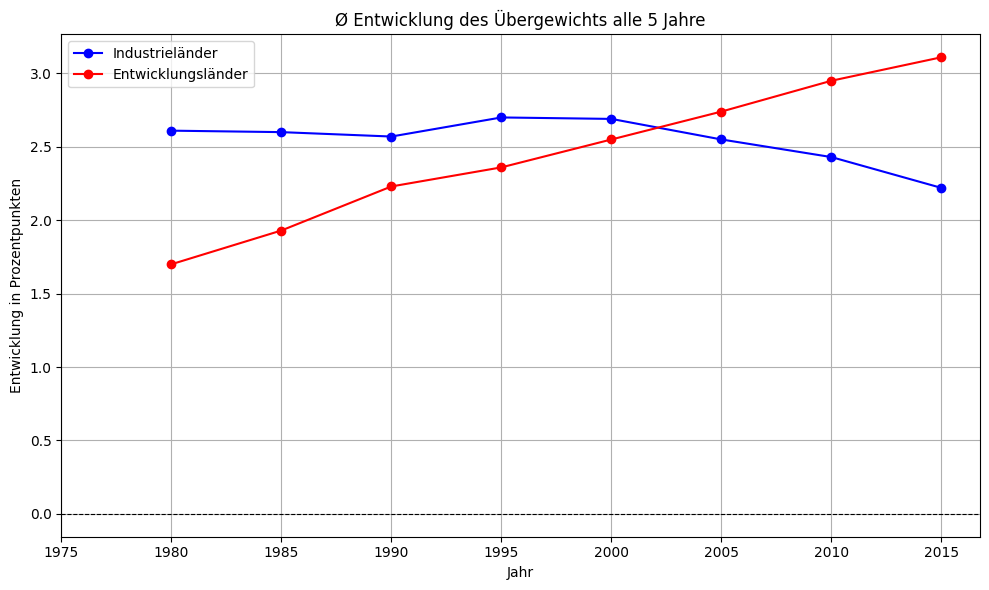

In [264]:
# Plot vorbereiten
plt.figure(figsize=(10, 6))

# Linien plotten
plt.plot(avg_table.index, avg_table["Anstieg Industrieländer"], marker="o", label="Industrieländer", color="blue")
plt.plot(avg_table.index, avg_table["Anstieg Entwicklungsländer"], marker="o", label="Entwicklungsländer", color="red")

# Plot anpassen
plt.title("Ø Entwicklung des Übergewichts alle 5 Jahre")
plt.xlabel("Jahr")
plt.ylabel("Entwicklung in Prozentpunkten")
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(avg_table.index)
plt.legend()
plt.tight_layout()
plt.show()